In [1]:
import scanpy as sc
import pandas as pd
import anndata as ad
import anndata2ri
import os

from hlca_v2.ingestion_utils import get_gspread_df, ValidationWorkflow, AnnDataMerger

GSPREAD_JSON = "/home/icb/raphael.kfuri-rubens/data/hlca_v2/google_sheets_api/hlca-v2-8d5fea10d8f3.json"

In [2]:
DATASET_ID = "Wu_unpubl"
H5AD_PATH = f"/home/icb/raphael.kfuri-rubens/data/hlca_v2/{DATASET_ID}/{DATASET_ID}.h5ad"

In [3]:
# Name constants
AUTHOR_CELL_TYPE_L0 = 'author_cell_type_level_0'
AUTHOR_CELL_TYPE_L1 = 'author_cell_type_level_1'

CELL_TYPE_ONTOLOGY_ID_L0 = 'cell_type_ontology_term_id_level_0'
CELL_TYPE_ONTOLOGY_ID_L1 = 'cell_type_ontology_term_id_level_1'

CELL_TYPE_ONTOLOGY_LABEL_L0 = 'cell_type_ontology_term_label_level_0'
CELL_TYPE_ONTOLOGY_LABEL_L1 = 'cell_type_ontology_term_label_level_1'

AUTHOR_CELL_TYPE_DESCRIPTION_L0 = 'author_cell_type_description_level_0'
AUTHOR_CELL_TYPE_DESCRIPTION_L1 = 'author_cell_type_description_level_1'

MARKER_GENES_L0 = 'author_cell_type_markers_level_0'
MARKER_GENES_L1 = 'author_cell_type_markers_level_1'

# Finest grained annotation will be generic dataset cell type
AUTHOR_CELL_TYPE = 'author_cell_type'
CELL_TYPE_ONTOLOGY_ID = 'cell_type_ontology_term_id'
CELL_TYPE_ONTOLOGY_LABEL = 'cell_type_ontology_term_label'
MARKER_GENES = 'author_cell_type_markers'
AUTHOR_CELL_TYPE_DESCRIPTION = 'author_cell_type_description'

# Load data

In [4]:
adata = sc.read_h5ad(H5AD_PATH)

In [6]:
adata

AnnData object with n_obs × n_vars = 150252 × 2000
    obs: 'sample', 'group', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'doublet_score', 'predicted_doublet', 'cluster', 'cell_type'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'cell_type_colors', 'cluster_colors', 'dendrogram_cluster', 'group_colors', 'hvg', 'leiden', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'sample_colors', 'scrublet', 'umap'
    obsm: 'X_pca', 'X_umap', 'ora_estimate', 'ora_pvals'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

/home/icb/raphael.kfuri-rubens/miniconda3/envs/hlcav2-env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


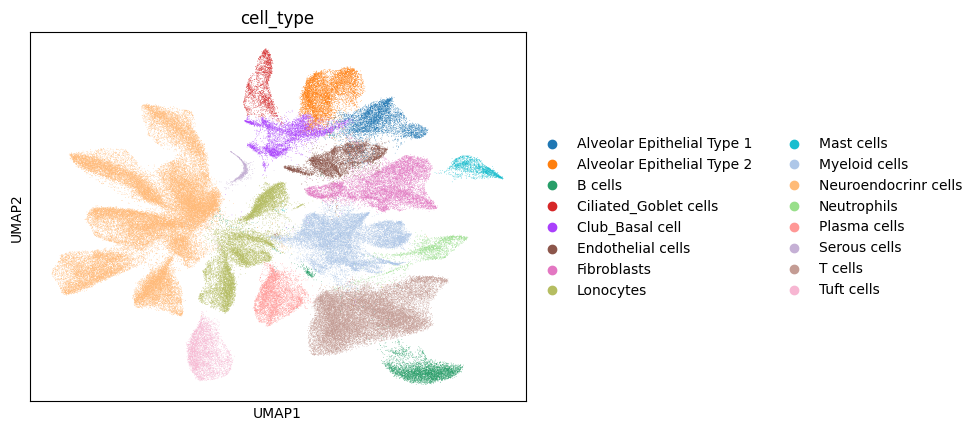

In [7]:
sc.pl.umap(adata, color='cell_type')

In [8]:
adata.obs['group'].value_counts()

T    108685
P     41567
Name: group, dtype: int64

In [10]:
adata.raw.X

<150252x18068 sparse matrix of type '<class 'numpy.float32'>'
	with 311327510 stored elements in Compressed Sparse Row format>